<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/1126_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터셋 로드
boston = load_boston()

#boston 데이터셋 datframe 변환
bostonDF = pd.DataFrame(boston.data, columns = boston. feature_names)

#boston 데이터셋의 target array는 주택 가격. 이를 PRICE 컬럼으로 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기:  (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


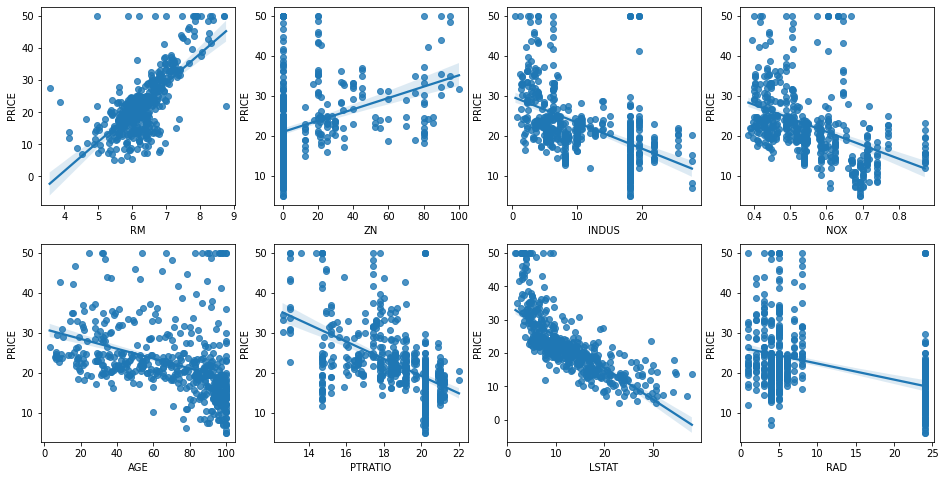

In [2]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs 는 4*2개의 ax를 가짐

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    #seaborn의 regplot을 이용해 산점도와 선형회귀직선 함께 표현
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=0)
#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {}, RMSE: {}'.format(mse, rmse))
print('Variance score: ', r2_score(y_test, y_preds))

MSE: 27.195965766883308, RMSE: 5.214975145375413
Variance score:  0.6733825506400184


In [6]:
print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  37.9371077418333
회귀 계수값:  [ -0.1   0.    0.    2.5 -16.2   3.9  -0.   -1.5   0.2  -0.   -1.    0.
  -0.5]


In [7]:
#회귀계수를 큰 값 순으로 정렬하기 위해 series로 생성. 인덱스 컬럼명에 유의

coeff = pd.Series(np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.9
CHAS        2.5
RAD         0.2
B           0.0
TAX        -0.0
AGE        -0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -1.0
DIS        -1.5
NOX       -16.2
dtype: float64

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

#cross_val_score()로 5폴드 세트로 MSE --> RMSE
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE score: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: ', avg_rmse)

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE score:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:  5.828658946215802
